# <center>Predictive model to assess BMW used automobile prices</center>

### <center> 27 June 2021 </center>
    
    
### **Table of Contents**
1. Project Motivation
2. The Dataset
3. Analysis Plan
4. Performance Metrics
5. Exploratory Data Analysis
6. Exploratory Data Analysis Summary
7. Model Development
8. Conclusion
9. References

## 1. Project Motivation

During the CoViD-19 pandemic, due to the accelerated transition to working from home and lockdowns all around the world, the demand for microchips used in electronics has increased with the demand for these devices. However, being produced by the same manufacturers with microchips for electronic devices, microchips for motor vehicles had to be pushed backwards in terms of priorities and this caused a shortage of chips in the motor vehicle industry.

Many great motor vehicle manufacturing companies cut production because of this chip shortage and less vehicles have entered to the market both in terms of quantity and variety.

Second hand vehicles are more in demand than ever now with the decrease in the supply of new vehicles and prices rose considerably. To get an insight of what factors have become more effective in pricing of used vehicles and respond accordingly to the gap of new cars in the market, BMW needs to analyze and model the data of recent used car sales.

This project aims to find out the effect of different factors of a car in pricing and create a model that predicts the price of a second hand BMW car that is on the market, or a BMW that is being sold.

## 2. The Dataset

BMW Used Car Sales dataset can be found on [Datacamp Career Hub on Github](https://github.com/datacamp/careerhub-data/blob/master/BMW%20Used%20Car%20Sales/README.md#bmw-used-car-sales)

### 2.1 Data Description

The data consists of 8 features and one target variable, price.

#### 2.1.1 Feature Variables

| Feature | Description | Data Type |
| ----------- | ----------- | ----------- |
| model | Model name of the automobile | categorical |
| year | Model year of the automobile | ordinal |
| transmission | Transmission type of the automobile | categorical |
| mileage | The distance the automobile has traveled in miles | numerical |
| fuelType | Whether the automobile runs on petrol or diesel | categorical |
| tax | Road tax of the automobile | numerical |
| mpg | Fuel consumption of the automobile (miles per gallon) | numerical |
| engineSize | Volume of the engine of the automobile in liter | ordinal |

#### 2.1.2 Target Variable

Target variable of the dataset is the sales price of the automobile, represented as **"price"** in the dataset and is a **numeric** variable.

## 3. Analysis Plan

This is a supervised single-variable regression analysis. The output of the model should be a single numerical value representing the price of the automobile.  
The following steps will be followed
1. Identify possible suitable performance metrics to measure the success of the analysis
2. Apply exploratory data analysis to get insights about the data and detect problems in the dataset
3. Select a suitable algorithm for model training to predict the data points out of the dataset
4. Fit, fine tune, evaluate and validate the model to get the model with the best performance
5. Provide discussions about the ways to improve the model

# 4. Performance Metrics

The target variable is a numerical continuous value. To measure the accuracy of the prediction of the model, an appropriate performance metric should be selected. Mean squared error or mean absolute error could be used for this purpose.

**Mean Squared Error (MSE)**  

Mean squared error is a popular metric that is used to calculate average of squared deviation of predicted values from actual values in the dataset.

For each data point, a residual error value is calculated and squared. Then the metric, mean squared error, is calculated as average of these values. 

**Mean Absolute Error (MSE)**  

Mean absolute error is calculated very similarly to mean squared error. Error value for each point is calculated and then the metric mean absolute error is calculated as average of absolute values of.

Difference between MSE and MAE is that MSE behaves relatively more punishing than MAE as it squares the error values. MAE is more robust when there are extreme high or extreme low values in the dataset.  

# 5. Exploratory Data Analysis

In order to get accurate results, the dataset should be inspected for data quality to behave accordingly.

We can start by importing necessary modules and the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(context='notebook', style='whitegrid', palette='pastel')

BMW = pd.read_csv('BMW.csv')
BMW.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


Further inspection of dataset

In [2]:
print("Number of null Values in each feature: \n" + str(BMW.isna().sum()), "\n")
display(BMW.info())

Number of null Values in each feature: 
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


None

The dataset consists of 10781 entries and it seems considerably large enough to get accurate results from the analysis.

Above, it is seen that there are no null entry in the dataset. However, when predicting new entries, null values should be handled.

Data types of the columns model, transmission, fuelType, mpg and price should be reassigned to the data types mentioned in Section 2. 

In [3]:
BMW.model = BMW.model.astype("category")
BMW.transmission = BMW.transmission.astype("category")
BMW.fuelType = BMW.fuelType.astype("category")
BMW.mpg = BMW.mpg.astype("int64")
BMW.price = BMW.price.astype("float64")
BMW.mileage = BMW.mileage.astype("float64")

BMW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         10781 non-null  category
 1   year          10781 non-null  int64   
 2   price         10781 non-null  float64 
 3   transmission  10781 non-null  category
 4   mileage       10781 non-null  float64 
 5   fuelType      10781 non-null  category
 6   tax           10781 non-null  int64   
 7   mpg           10781 non-null  int64   
 8   engineSize    10781 non-null  float64 
dtypes: category(3), float64(3), int64(3)
memory usage: 538.2 KB


The dataset contains 3 categorical features, 3 ordinal features encoded as integers, 1 continuous numerical feature and 1 continuous numerical target variable.

The data types are corrected and now, starting with general statistics, features can be explored.

In [4]:
BMW.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,55.896299,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.313849,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.000000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.000000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.000000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.000000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.000000,6.600000


The summary statistics indicates that there are outliers in the data with wide ranges and relatively low standard deviations. Having a large dataset, eliminating these outliers wouldn't affect the analysis.

**price - Sales price of the automobile**

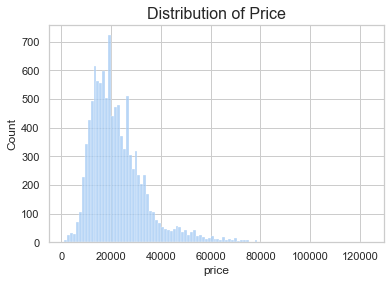

In [5]:
sns.histplot(x = 'price', data = BMW).set_title('Distribution of Price', size = 16)
plt.show()

The distribution of price is, as it can be seen on the histogram above, right skewed. This may indicate that there are outliers with too the high prices. A box plot would be helpful to detect those outliers.

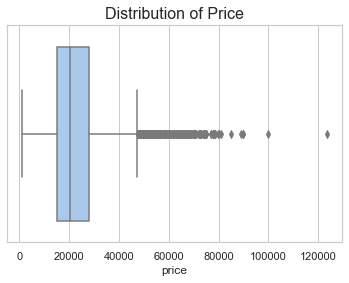

In [6]:
sns.boxplot(x = 'price', data = BMW).set_title('Distribution of Price', size = 16)
plt.show()

From the boxplot above, it is seen that there are outliers with too high prices in the dataset. The outliers and the dataset without outliers should be inspected to make sure that no feature is underrepresented in the dataset without outliers. 

In [7]:
from scipy import stats

price_iqr = stats.iqr(BMW.price)

price_outliers = BMW[BMW.price > BMW.price.describe()["75%"] + price_iqr * 1.5]

print(price_outliers.groupby("model").count()["price"])
price_outliers.describe()

model
 1 Series      0
 2 Series      1
 3 Series      4
 4 Series      3
 5 Series      1
 6 Series      1
 7 Series     38
 8 Series     39
 M2            4
 M3            2
 M4           39
 M5           21
 M6            0
 X1            0
 X2            0
 X3           28
 X4            8
 X5          178
 X6           48
 X7           55
 Z3            0
 Z4            1
 i3            0
 i8           13
Name: price, dtype: int64


,year,price,mileage,tax,mpg,engineSize
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,2019.103306,57522.811983,4634.159091,145.020661,37.902893,3.049380
std,0.644831,9283.538131,4463.625969,16.622081,23.962118,0.516137
min,2015.000000,47440.000000,3.000000,0.000000,5.000000,1.500000
25%,2019.000000,49999.750000,1427.500000,145.000000,31.000000,3.000000
50%,2019.000000,54990.000000,4000.000000,145.000000,34.000000,3.000000
75%,2019.000000,62992.000000,6501.500000,145.000000,37.000000,3.000000
max,2020.000000,123456.000000,36127.000000,300.000000,188.000000,6.600000


In [8]:
BMW_wo_outliers = BMW[~BMW.isin(price_outliers)]

BMW_wo_outliers.groupby("model").count()["price"]

model
 1 Series    1969
 2 Series    1228
 3 Series    2439
 4 Series     992
 5 Series    1055
 6 Series     107
 7 Series      68
 8 Series       0
 M2            17
 M3            25
 M4            86
 M5             8
 M6             8
 X1           804
 X2           288
 X3           523
 X4           171
 X5           290
 X6            58
 X7             0
 Z3             7
 Z4           107
 i3            43
 i8             4
Name: price, dtype: int64

Inspecting the feature "model", it is seen that some high-end models such as i8, X7, 8 Series, 7 Series and M5 are underrepresented in the dataset without outliers. So, instead of directly eliminating the outliers in all dataset, eliminating the outliers in each model type would be a better approach. In other words, the outliers in the feature "price" should be handled in a multivariate approach.

In [9]:
unique_models = BMW.model.unique()

price_outliers = pd.DataFrame(columns = BMW.columns)

for model in unique_models:
    model_df = BMW[BMW.model == model]
    model_price_iqr = stats.iqr(model_df.price.to_numpy())
    model_df_outliers = \
        model_df[(model_df.price > model_df.price.describe()["75%"] + model_price_iqr * 1.5) | \
        (model_df.price < model_df.price.describe()["25%"] - model_price_iqr * 1.5)]
    price_outliers = price_outliers.append(model_df_outliers)

BMW_v2 = BMW[~BMW.isin(price_outliers)]

print("Number of Outliers Eliminated: ", len(price_outliers))
BMW_v2.groupby("model").count()["price"]

Number of Outliers Eliminated:  70


model
 1 Series    1949
 2 Series    1217
 3 Series    2437
 4 Series     988
 5 Series    1055
 6 Series     107
 7 Series     106
 8 Series      37
 M2            19
 M3            27
 M4           122
 M5            29
 M6             7
 X1           802
 X2           279
 X3           548
 X4           179
 X5           468
 X6           106
 X7            55
 Z3             6
 Z4           108
 i3            43
 i8            17
Name: price, dtype: int64

After eliminating outliers according to "model" variable, we can continue investigating relationships of other feature variables.

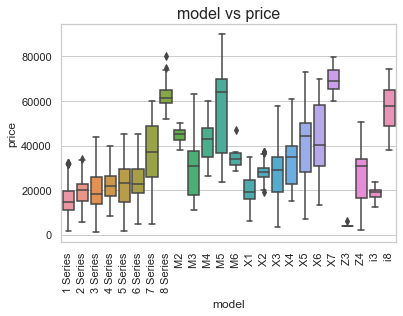

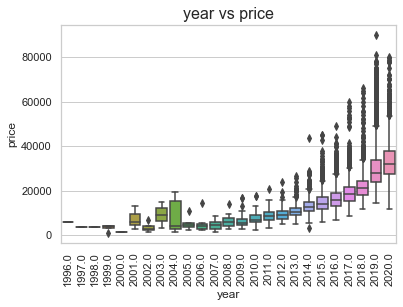

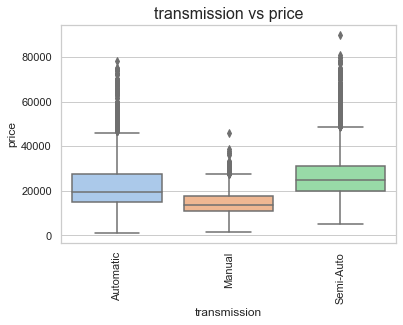

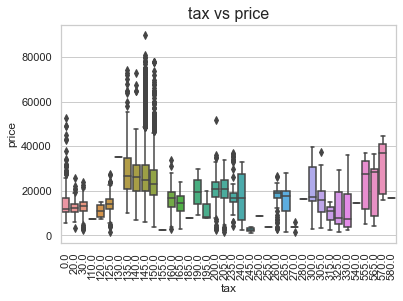

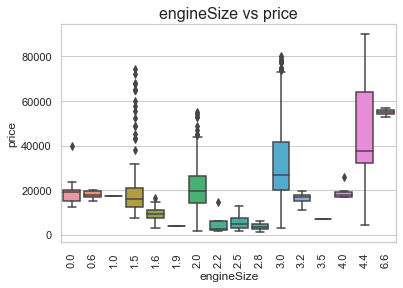

In [10]:
features = ['model', 'year', 'transmission', 'tax', 'engineSize']

for feature in features:
    sns.boxplot(x = feature, y = 'price', data = BMW_v2, orient = 'v')\
    .set_title(feature + " vs price", size = 16)
    plt.xticks(rotation = 90)
    plt.show()

From the boxplots above, it is seen that "model", "year" and "transmission" features correlates with the price.

A scatterplot should be used to investigate the relationship between the feature "mpg" and the target variable "price".

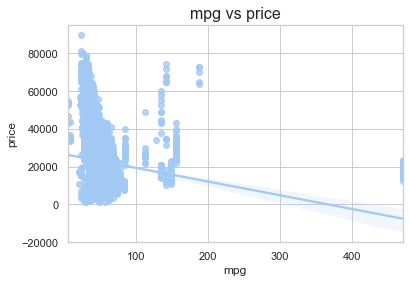

In [11]:
sns.regplot(data = BMW_v2, x = 'mpg', y = 'price')\
    .set_title("mpg vs price", size = 16)
plt.show()

As it is seen from the regression plot above, correlation between mpg and price is rather weak.

Pearson correlation coefficients could be generated to inspect the correlation between of each feature with price.

Also correlation matrix and a heatmap would be beneficial to visualize the correlations between the features

 Pearson Correlation Coefficients of Features with Price
 year          0.630547
price         1.000000
mileage      -0.608819
tax           0.266654
mpg          -0.203221
engineSize    0.463104
Name: price, dtype: float64


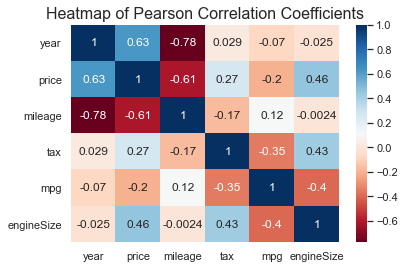

In [12]:
print(" Pearson Correlation Coefficients of Features with Price\n",\
      BMW_v2.corr().price)


sns.heatmap(data = BMW_v2.corr(), annot = True, cmap = "RdBu") \
    .set_title("Heatmap of Pearson Correlation Coefficients", size = 16)
plt.show()

The price is positively correlated with model year and engine size of the automobile. The relationship between year and price can be explained as people tend to pay more to newer vehicles since they are more modern and less likely to fail in general. Engine size is another feature that is positively correlated with price that is significant enough to mention. Engine size is directly related with performance and paying more for a greater engine size is understandable.

Negative correlation between mileage and price is also explainable as a car with higher mileage is older. This can be understood from the significant negative correlation between year and mileage features. Older a vehicle, more mileage it has.

Road tax and fuel consumption does not seem to have a significant correlation with price, even though a negative correlation would be expected.

**year - Model year of the automobile**

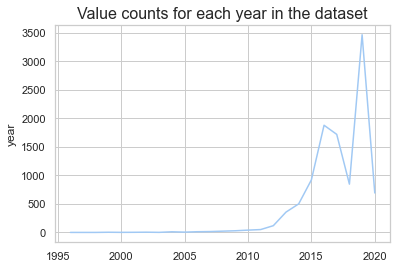

In [18]:
sns.lineplot(data = BMW_v2.year.value_counts().sort_index()).set_title('Value counts for each year in the dataset', size = 16)
plt.show()

In the dataset, older cars are underrepresented. Vehicles manufactured before 2012 could be considered as outliers and eliminated from the dataset.

In [14]:
BMW_v3 = BMW_v2[BMW_v2.year >= 2012]

display(BMW_v3.describe())
print("Size of the new version of the dataset: ", BMW_v3.shape[0])

,year,price,mileage,tax,mpg,engineSize
count,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000
mean,2017.248190,22908.479333,24437.584000,129.543810,56.252762,2.162210
std,1.928506,11097.690768,23591.749611,57.956571,31.598492,0.549199
min,2012.000000,3076.000000,1.000000,0.000000,5.000000,0.000000
25%,2016.000000,15000.000000,5500.750000,125.000000,46.000000,2.000000
50%,2017.000000,20590.000000,17882.000000,145.000000,53.000000,2.000000
75%,2019.000000,27950.000000,36930.000000,145.000000,62.000000,2.000000
max,2020.000000,89900.000000,214000.000000,570.000000,470.000000,6.600000


Size of the new version of the dataset:  10500


**mileage - The distance the automobile has traveled in miles**

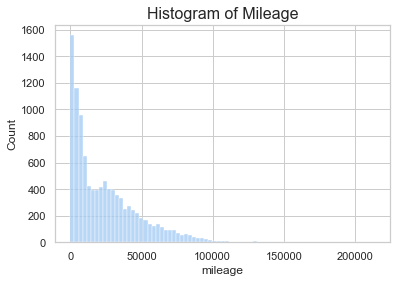

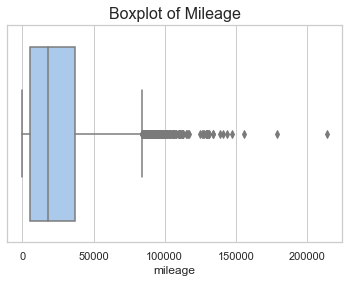

count     10500.000000
mean      24437.584000
std       23591.749611
min           1.000000
25%        5500.750000
50%       17882.000000
75%       36930.000000
max      214000.000000
Name: mileage, dtype: float64

In [20]:
sns.histplot(x = BMW_v3.mileage).set_title("Histogram of Mileage", size = 16)
plt.show()
sns.boxplot(x = BMW_v3.mileage).set_title("Boxplot of Mileage", size = 16)
plt.show()
BMW_v3.mileage.describe()

The histogram and boxplot above implies that there are outliers with very high mileage. As mileage is directly correlated with age of the car and price, we should also handle these outliers with a multivariate approach.

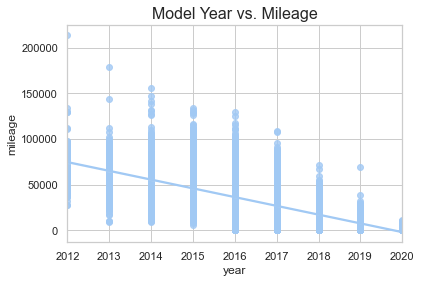

In [16]:
sns.regplot(x = 'year', y = 'mileage' , data = BMW_v3)\
    .set_title("Model Year vs. Mileage", size = 16)
plt.show()

Number of Outliers Eliminated:  351
year
2012.0     114
2013.0     355
2014.0     489
2015.0     901
2016.0    1799
2017.0    1633
2018.0     825
2019.0    3389
2020.0     644
Name: mileage, dtype: int64


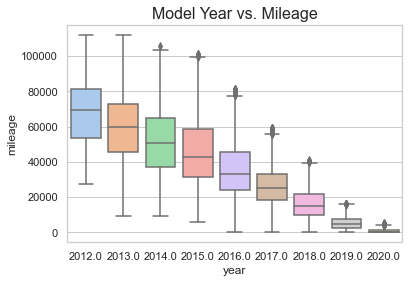

In [17]:
unique_years = BMW_v3.year.unique()
mileage_outliers = pd.DataFrame(columns = BMW_v3.columns)

for year in unique_years:
    year_df = BMW_v3[BMW_v3.year == year]
    year_mileage_iqr = stats.iqr(year_df.mileage.to_numpy())
    year_df_outliers = \
        year_df[(year_df.mileage > year_df.mileage.describe()["75%"] + year_mileage_iqr * 1.5) | \
        (year_df.mileage < year_df.mileage.describe()["25%"] - year_mileage_iqr * 1.5)]
    mileage_outliers = mileage_outliers.append(year_df_outliers)

BMW_v4 = BMW_v3[~BMW_v3.isin(mileage_outliers)].dropna()

print("Number of Outliers Eliminated: ", len(mileage_outliers))
print(BMW_v4.groupby("year").count()["mileage"])
sns.boxplot(x = 'year', y = 'mileage' , data = BMW_v4)\
    .set_title("Model Year vs. Mileage", size = 16)
plt.show()

Although there are still outliers in mileage according to year feature, they are not significant and can be kept in the dataset.

The features **"tax"** and **"mpg"** are not significantly correlated with any other feature and can be investigated in a univariate manner.

In [18]:
BMW_v4.describe()[["tax", "mpg"]]

,tax,mpg
count,10149.000000,10149.000000
mean,130.155188,56.124347
std,57.804293,31.854627
min,0.000000,5.000000
25%,135.000000,46.000000
50%,145.000000,53.000000
75%,145.000000,62.000000
max,570.000000,470.000000


Minimum and maximum of both variables implies outliers. Especially "tax" having a mean below 25th percentile, these outliers should be investigated.

**tax - Road tax of the automobile**

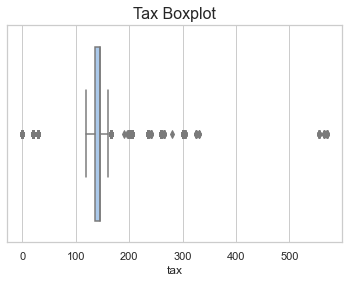

In [19]:
sns.boxplot(x = "tax", data = BMW_v4 )\
    .set_title("Tax Boxplot", size = 16)
plt.show()

The boxplot above points out the existence of outliers in “tax” feature. Those points should be investigated.

In [20]:
tax_iqr = stats.iqr(BMW_v4.tax.to_numpy())

tax_outliers = BMW_v4\
    [(BMW_v4.tax > BMW_v4.tax.describe()['75%'] + tax_iqr * 1.5) |\
      (BMW_v4.tax < BMW_v4.tax.describe()['25%'] - tax_iqr * 1.5)]

tax_outliers.count()

model           2460
year            2460
price           2460
transmission    2460
mileage         2460
fuelType        2460
tax             2460
mpg             2460
engineSize      2460
dtype: int64

Although the dataset is large, dropping 2460 entries could affect the analysis. Eliminating only those below 100 and above 500 could be more appropriate.

model           1728
year            1728
price           1728
transmission    1728
mileage         1728
fuelType        1728
tax             1728
mpg             1728
engineSize      1728
dtype: int64


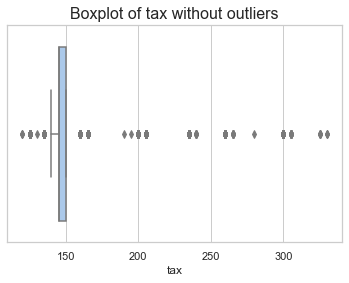

In [21]:
tax_outliers = BMW_v4\
    [(BMW_v4.tax > 500) |\
      (BMW_v4.tax < 100)]

print(tax_outliers.count())
sns.boxplot(x = 'tax', data = BMW_v4[~BMW_v4.isin(tax_outliers)])\
.set_title("Boxplot of tax without outliers", size = 16)
plt.show()

Eliminating the 1728 data points with "tax" below 100 or above 500 unfortunately does not show a significant improvement. For this analysis, keeping these data points in the dataset would lead to better results.

**mpg - Miles per Gallon**  

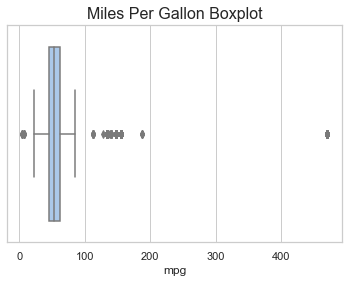

In [22]:
sns.boxplot(x = "mpg", data = BMW_v4 )\
    .set_title("Miles Per Gallon Boxplot", size = 16)
plt.show()

In [23]:
mpg_iqr = stats.iqr(BMW_v4.mpg.to_numpy())

mpg_outliers = BMW_v4\
    [(BMW_v4.mpg > BMW_v4.mpg.describe()['75%'] + mpg_iqr * 1.5) |\
      (BMW_v4.mpg < BMW_v4.mpg.describe()['25%'] - mpg_iqr * 1.5)]

mpg_outliers.count()

model           254
year            254
price           254
transmission    254
mileage         254
fuelType        254
tax             254
mpg             254
engineSize      254
dtype: int64

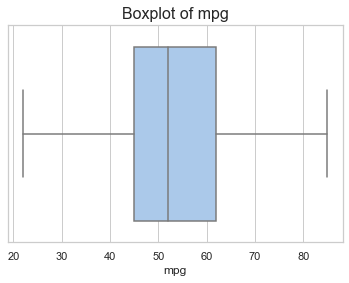

In [24]:
BMW_v5 = BMW_v4[~BMW_v4.isin(mpg_outliers)]

sns.boxplot(x = 'mpg', data = BMW_v5)\
    .set_title("Boxplot of mpg", size = 16)
plt.show()

Removing only 254 data points resulted in a dataset without outliers in the feature "mpg". 

**engineSize - Engine size of the vehicle**

count    9895.000000
mean        2.178413
std         0.539074
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         6.600000
Name: engineSize, dtype: float64


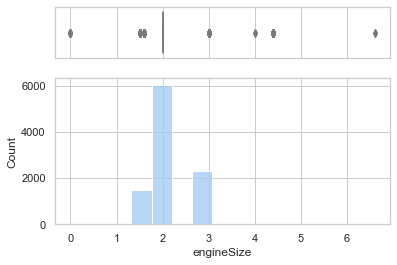

In [25]:
print(BMW_v5.engineSize.describe())

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.30, .85)})
 
sns.boxplot(data = BMW_v5, x = "engineSize", ax=ax_box)
sns.histplot(data=BMW_v5, x="engineSize", ax=ax_hist)

ax_box.set(xlabel='')
plt.show()

A significant portion of dataset have engine size of 2.0 liters. There seems to be engine sizes below 1.0 liter, however, considering the listings on [Engine Chart on CJPonyParts.com](https://www.cjponyparts.com/resources/engine-size-chart) and [Autobytel](https://www.autobytel.com/car-buying-guides/features/10-cars-with-the-smallest-engines-for-the-highest-epa-grades-129325/), engines smaller than 1 liter are outliers.  

In [26]:
BMW_v5[BMW_v5.engineSize <= 1.0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7422,1 Series,2017.0,12800.0,Manual,18067.0,Petrol,20.0,68.0,0.0
7452,3 Series,2018.0,18000.0,Automatic,21057.0,Diesel,150.0,64.0,0.0
8599,1 Series,2017.0,13500.0,Manual,16681.0,Diesel,150.0,68.0,0.0
8699,1 Series,2017.0,12800.0,Manual,30521.0,Diesel,145.0,68.0,0.0
8701,3 Series,2018.0,18000.0,Automatic,23611.0,Diesel,150.0,64.0,0.0
8708,3 Series,2018.0,18000.0,Automatic,24716.0,Diesel,150.0,64.0,0.0
8710,1 Series,2016.0,12400.0,Manual,24528.0,Diesel,20.0,68.0,0.0
8735,2 Series,2016.0,15000.0,Automatic,17097.0,Diesel,20.0,68.0,0.0
8934,2 Series,2015.0,14700.0,Automatic,32882.0,Diesel,125.0,60.0,0.0
8955,3 Series,2018.0,18000.0,Automatic,24240.0,Diesel,150.0,64.0,0.0


As suspected, 11 cars in the dataset with engine size below 1.0 are data errors with 0 engine size and eliminating these points would not affect the analysis considering the size of the dataset.  

Also there are data poins with engine size above 3.0 liters, which are very few. Those points should be investigate to either keep in the dataset or eliminate.

In [27]:
BMW_v5[BMW_v5.engineSize > 3].value_counts("engineSize")

engineSize
4.4    72
6.6     2
4.0     2
dtype: int64

In [28]:
BMW_v5[BMW_v5.engineSize > 3].value_counts("model")

model
 M5          28
 X5          14
 7 Series     9
 M6           7
 6 Series     5
 8 Series     5
 X6           4
 M3           2
 5 Series     2
 2 Series     0
 3 Series     0
 4 Series     0
 M2           0
 i8           0
 M4           0
 i3           0
 X1           0
 X2           0
 X3           0
 X4           0
 X7           0
 Z3           0
 Z4           0
 1 Series     0
dtype: int64

Although for engine size, values over 3.0 seems like outliers, eliminating these values from datasets would have an impact on the analysis as these values belong to limited number of high end vehicles.

In [73]:
BMW_v6 = BMW_v5[BMW_v5.engineSize > 1.0]

BMW_v6.describe()

,year,price,mileage,tax,mpg,engineSize
count,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000
mean,2017.241603,22946.148321,23144.057972,131.592473,52.648422,2.180838
std,1.945297,10935.522085,21820.504375,56.606526,11.293358,0.534450
min,2012.000000,3076.000000,1.000000,0.000000,22.000000,1.500000
25%,2016.000000,15083.000000,5242.500000,145.000000,45.000000,2.000000
50%,2017.000000,20875.000000,16892.000000,145.000000,52.000000,2.000000
75%,2019.000000,27955.000000,35499.250000,145.000000,62.000000,2.000000
max,2020.000000,89900.000000,112000.000000,570.000000,85.000000,6.600000


# 6. Exploratory Data Analysis Summary

During the exploratory data analysis, the relationships between features and target variable have been inspected. There are strong correlations between year, mileage and price variables. These can be explained as newer cars and less used cars tend to cost more as they are technologically more advanced and less likely to be problematic. Also one can expect that the vehicles which are newer have less mileage.

It is also discovered that model affects the price as different models have different monetary values and, engine sizes and models are dependent on each other, as each model are produced with specific engine sizes.

# 7. Model Development

The dataset consists of both categorical and numerical features and the target 
value is a single numerical value. A tree based regressor would perform well with this dataset and as mentioned above in the 4th section, mean absolute error will be utilized to measure the performance of the model.

In this study, Light Gradient Boosting Regressor, Extreme Gradient Boosting Regressor, Extreme Gradient Boosting Random Forst Regressor and Random Forest Regressor will be used in a pipeline with a One-Hot Encoder and best parameters for these pipelines will be searched with a GridSearchCV object.

In [30]:
# Importing necessary classes and functions

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

In [31]:
# Setting up one-hot encoder to transform categorical variables into dummies
oh_encoder =  make_column_transformer((OneHotEncoder(sparse = False,
                                                    handle_unknown = 'ignore'),
                                      make_column_selector(dtype_include = 'category')),
                                      remainder = 'passthrough',
                                      n_jobs = -1
                                     )

In [32]:
# The parameter grid for Grid Search Cross-Validation will be the same for
# XGBRegressor and XGBRFRegressor, but number of leaves will be used with LGBMRegressor
# and RandomForestRegressor will not have learning rate.

parameter_grid_LGB = {'clf__n_estimators': [20, 40, 50],
                 'clf__max_depth': [5,6,8,9,None],
                 'clf__num_leaves': [20, 30, 40],
                 'clf__learning_rate': [0.05, 0.1, 0.15]}

parameter_grid_XGB = {'clf__n_estimators': [20, 40, 50],
                 'clf__max_depth': [5,6,8,9,None],
                 'clf__learning_rate': [0.05, 0.1, 0.15]}

parameter_grid_RFR = {'clf__n_estimators': [30, 40, 50],
                 'clf__max_depth': [8,9,None]}

In [33]:
# Splitting the dataset into train and test datasets
X = BMW_v6
y = X.pop('price')

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 123,
                                                    shuffle = True)

In [35]:
# Starting with Ligth Gradient Boosting Method

lgbm_pipe = Pipeline([('oh_encoder', oh_encoder), 
                          ('clf', LGBMRegressor(random_state = 123))])

gs_lgbm = GridSearchCV(lgbm_pipe,
                       parameter_grid_LGB,
                       cv = 5,
                       scoring = 'neg_mean_absolute_error',
                      return_train_score = True)
gs_lgbm.fit(X_train, y_train)

print('Best Params For LGBM Regressor: \n', gs_lgbm.best_params_,
      '\nBest Score For LGBM Regressor: ', gs_lgbm.best_score_,
      '\nMAE score on test data: ', mean_absolute_error(y_test, gs_lgbm.predict(X_test)))

Best Params For LGBM Regressor: 
 {'clf__learning_rate': 0.15, 'clf__max_depth': None, 'clf__n_estimators': 50, 'clf__num_leaves': 40} 
Best Score For LGBM Regressor:  -1526.5953788620043 
MAE score on test data:  1532.8898801253054


In [36]:
# Now, XGBRFRegressor

xgbrf_pipe = Pipeline([('oh_encoder', oh_encoder), 
                          ('clf', XGBRFRegressor(random_state = 123))])

gs_xgbrf = GridSearchCV(xgbrf_pipe,
                       parameter_grid_XGB,
                       cv = 5,
                       scoring = 'neg_mean_absolute_error',
                      return_train_score = True)
gs_xgbrf.fit(X_train, y_train)

print('Best Params For XGBRF Regressor: \n', gs_xgbrf.best_params_,
      '\nBest Score For XGBRF Regressor: ', gs_xgbrf.best_score_,
      '\nMAE score on test data: ', mean_absolute_error(y_test, gs_xgbrf.predict(X_test)))

Best Params For XGBRF Regressor: 
 {'clf__learning_rate': 0.15, 'clf__max_depth': 6, 'clf__n_estimators': 40} 
Best Score For XGBRF Regressor:  -19413.6625633909 
MAE score on test data:  19788.76598582621


In [37]:
# Now, XGBRegressor

xgb_pipe = Pipeline([('oh_encoder', oh_encoder), 
                          ('clf', XGBRegressor(random_state = 123))])

gs_xgb = GridSearchCV(xgb_pipe,
                       parameter_grid_XGB,
                       cv = 5,
                       scoring = 'neg_mean_absolute_error',
                      return_train_score = True)
gs_xgb.fit(X_train, y_train)

print('Best Params For XGB Regressor: \n', gs_xgb.best_params_,
      '\nBest Score For XGB Regressor: ', gs_xgb.best_score_,
     '\nMAE score on test data: ', mean_absolute_error(y_test, gs_xgb.predict(X_test)))

Best Params For XGB Regressor: 
 {'clf__learning_rate': 0.15, 'clf__max_depth': 9, 'clf__n_estimators': 50} 
Best Score For XGB Regressor:  -1464.1448680677884 
MAE score on test data:  1483.519436399737


In [38]:
# Lastly, Random Forest Regressor Method

rf_pipe = Pipeline([('oh_encoder', oh_encoder), 
                          ('clf', RandomForestRegressor(random_state = 123,
                                                       criterion = 'mae',
                                                       n_jobs = -1))])

gs_rf = GridSearchCV(rf_pipe,
                       parameter_grid_RFR,
                       cv = 5,
                       scoring = 'neg_mean_absolute_error',
                      return_train_score = True)
gs_rf.fit(X_train, y_train)

print('Best Params For Random Forest Regressor: \n', gs_rf.best_params_,
      '\nBest Score For Random Forest Regressor: ', gs_rf.best_score_,
     '\nMAE score on test data: ', mean_absolute_error(y_test, gs_rf.predict(X_test)))

Best Params For Random Forest Regressor: 
 {'clf__max_depth': None, 'clf__n_estimators': 50} 
Best Score For Random Forest Regressor:  -1520.6485753155646 
MAE score on test data:  1538.0875354107648


Extreme Gradient Boosting Regressor performed the best among these models with a MAE of 1464.14 for train dataset and 1483.52 for test dataset. Scores for train and test data being this close indicates that there is no overfitting. However, the best parameters for this model are those in the upper boundary of parameter grid. It should be seen if this model would perform better with a different parameter grid.

In [40]:
parameter_grid_XGB_2 = {'clf__n_estimators': [50, 60, 80, 100],
                 'clf__max_depth': [9, 10, 11, None],
                 'clf__learning_rate': [0.15, 0.2, 0.25]}

xgb_pipe = Pipeline([('oh_encoder', oh_encoder), 
                          ('clf', XGBRegressor(random_state = 123))])

gs_xgb_2 = GridSearchCV(xgb_pipe,
                       parameter_grid_XGB_2,
                       cv = 5,
                       scoring = 'neg_mean_absolute_error',
                      return_train_score = True)
gs_xgb_2.fit(X_train, y_train)

print('Best Params For XGB Regressor: \n', gs_xgb_2.best_params_,
      '\nBest Score For XGB Regressor: ', gs_xgb_2.best_score_,
     '\nMAE score on test data: ', mean_absolute_error(y_test, gs_xgb_2.predict(X_test)))

Best Params For XGB Regressor: 
 {'clf__learning_rate': 0.15, 'clf__max_depth': 10, 'clf__n_estimators': 60} 
Best Score For XGB Regressor:  -1454.3282968266758 
MAE score on test data:  1464.553199141289


Looking at the score above, we can see that the best performing model is Extreme Gradient Boosting Regression with 60 estimators, 10 max depth and 0.15 learning rate, having MAE with training dataset of 1454.33, and training dataset of 1464.55.

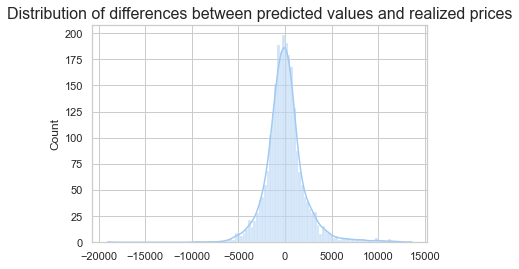

In [126]:
diff_series = y_test.reset_index(drop = True) - pd.Series(gs_xgb_2.predict(X_test))
sns.histplot(data = diff_series, kde = True).set_title('Distribution of differences between predicted values and realized prices', size = 16)
plt.show()

From the histogram above, it can be seen that most of the predicted values does not differ from the realized values significantly. So, the model trained in this study seems to be considerably accurate.

Weights of the features should also be investigated to validate the results with price correlations.

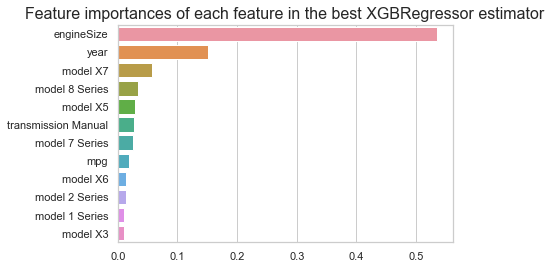

In [76]:
# Extracting the best model from GridSearchCV
best_model = gs_xgb_2.best_estimator_

# Extracting the feature names and renaming them
feature_names = best_model.named_steps.oh_encoder.get_feature_names()

feature_names = [i.replace('onehotencoder__x0_', 'model') for i in feature_names]
feature_names = [i.replace('onehotencoder__x1_', 'transmission ') for i in feature_names]
feature_names = [i.replace('onehotencoder__x2_', 'fuelType ') for i in feature_names]

# Extracting the feature importances
feature_importances = best_model[1].feature_importances_

# Selecting those with significant importances
importances = pd.Series(feature_importances, feature_names)
importances = importances.sort_values(ascending = False)
importances = importances[importances > 0.01]

# Plotting the significant feature importances
sns.barplot(x = importances, y = importances.index)\
.set_title('Feature importances of each feature in the best XGBRegressor estimator', size = 16)
plt.show()

The graph above shows that while estimating the price value, the estimator considers engine size of a significant importance. Formerly, it is discovered that "engineSize" feature has a moderate correlation with "price" value. Also, as it is stated before, it can be explained with engine size having a direct effect on the performance of the vehicle.

High-end models like X7, 8 series, X5, and lower-end vehicles like 1 Series and 2 Series have a slightly higher importance than middle-end vehicles. This indicates that model of the vehicle actually affects the price value.

It can also be seen that model year has a considerable importance. It can be verified via looking at the correlation coefficient between "year" and "price" values in the dataset, which is 0.63.

Another point that needs attention is, "mileage" feature has a very little feature importance. This can be explained with the negative correlation between "year" and "mileage" features. Model year having a high importance in the model let the model to disregard the importance of mileage.

Overall, it can be seen that the feature importances of the model are explainable and relatable.

## 8. Conclusion

This study aimed to build a predictive model to help to assess BMW used prices, with the increasing demand of used cars during the CoViD-19 pandemic using the dataset published on Datacamp Github repository.

An extreme gradient boosting method regression model is developed to predict "price" value, given in Dollars. The model uses engine size, model year, model and miles per gallon information about the vehicle.

The performance of the model is measured with mean absolute error. This measurement helped to train a model that predicts values as accurately as possible without punishing extreme mispredictions too greatly, as cost of an extreme misprediction will not be as great as being worse in total of mispredictions.

The mean absolute error value of the model is close for both training and testing dataset and have the values 1454.33 and 1464.55 respectively. Considering the mean price in the dataset, which is 22946.15 Dollars and the standard deviaton of 10935.52 Dollars, this deviation is considerably low and performance of model is decent enough to be used in prediction of a certain vehicle by retailers. 

To improve the performance of the model, a different outlier analysis practice can be used, feature engineering practices can be applied, a more specific grid search can be conducted or a different type of prediction model can be utilized.

## 9. References

1. The dataset is provided by [Datacamp Career Hub on Github](https://github.com/datacamp/careerhub-data/blob/master/BMW%20Used%20Car%20Sales/README.md#bmw-used-car-sales)
2. Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. In Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (pp. 785–794). New York, NY, USA: ACM. https://doi.org/10.1145/2939672.2939785
3. [Scikit-learn: Machine Learning in Python](http://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html), Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
4. [Sample Project Provided on Datacamp Certification Program Guideline](https://s3.amazonaws.com/talent-assets.datacamp.com/case_study_sample.pdf)
5. [Engine Chart on CJPonyParts.com](https://www.cjponyparts.com/resources/engine-size-chart)
6. [10 Cars with the Smallest Engines for the Highest EPA grades on Autobytel.com](https://www.autobytel.com/car-buying-guides/features/10-cars-with-the-smallest-engines-for-the-highest-epa-grades-129325/)